## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime



In [2]:
#Load the data
booking_data = pd.read_csv('data/hotel_bookings.csv')

In [3]:
booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Rows & Columns
booking_data.shape

(119390, 32)

In [5]:
#Summary of the data
booking_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Explore & Clean the Data

In [17]:
booking_data['children'].fillna(0, inplace=True)
booking_data['country'].fillna('N/A', inplace=True)
booking_data.drop(['agent','company','arrival_date_week_number'],axis=1,inplace=True)

In [18]:
booking_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [19]:
#number of unique Resort Hotel & City Hotel bookings
hotel_type = booking_data['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

The data contains almost double the amount of City Hotel bookings compared to Resort Hotel bookings

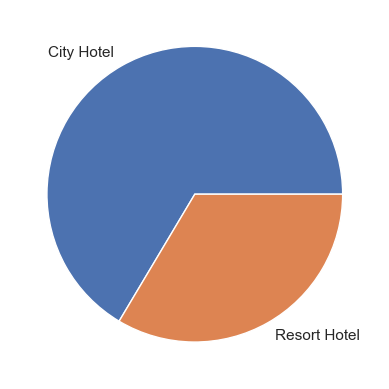

In [20]:
y = hotel_type.tolist()

labels = hotel_type.index.tolist()

plt.pie(y, labels=labels)
plt.show()



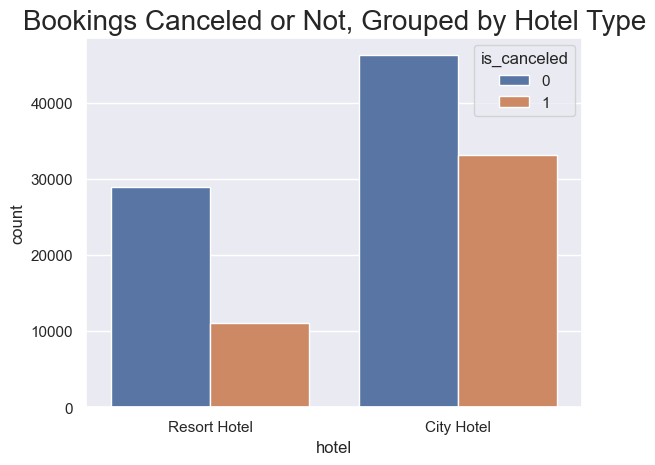

In [21]:
#Between the City and Reort Hotels, how many bookings were Canceled vs Not Canceled 
sns.set(style = "darkgrid")
plt.title("Bookings Canceled or Not, Grouped by Hotel Type", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = booking_data)

Even though city hotels receive more bookings, they receive more cancellations on average compare to Resort hotels. 

Why do you think that is?

In [63]:
#Split the City hotel data into its own data set
city_data = booking_data[booking_data.hotel == 'City Hotel']
city_data.head().T

,40060,40061,40062,40063,40064
hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,1,1,1,1
lead_time,6,88,65,92,100
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_day_of_month,1,1,1,1,2
stays_in_weekend_nights,0,0,0,2,0
stays_in_week_nights,2,4,4,4,2
adults,1,2,1,2,2
children,0.0,0.0,0.0,0.0,0.0


In [62]:
#Split the Resort Hotel data into its own data set
resort_data = booking_data[booking_data.hotel == 'Resort Hotel']
resort_data.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
children,0.0,0.0,0.0,0.0,0.0


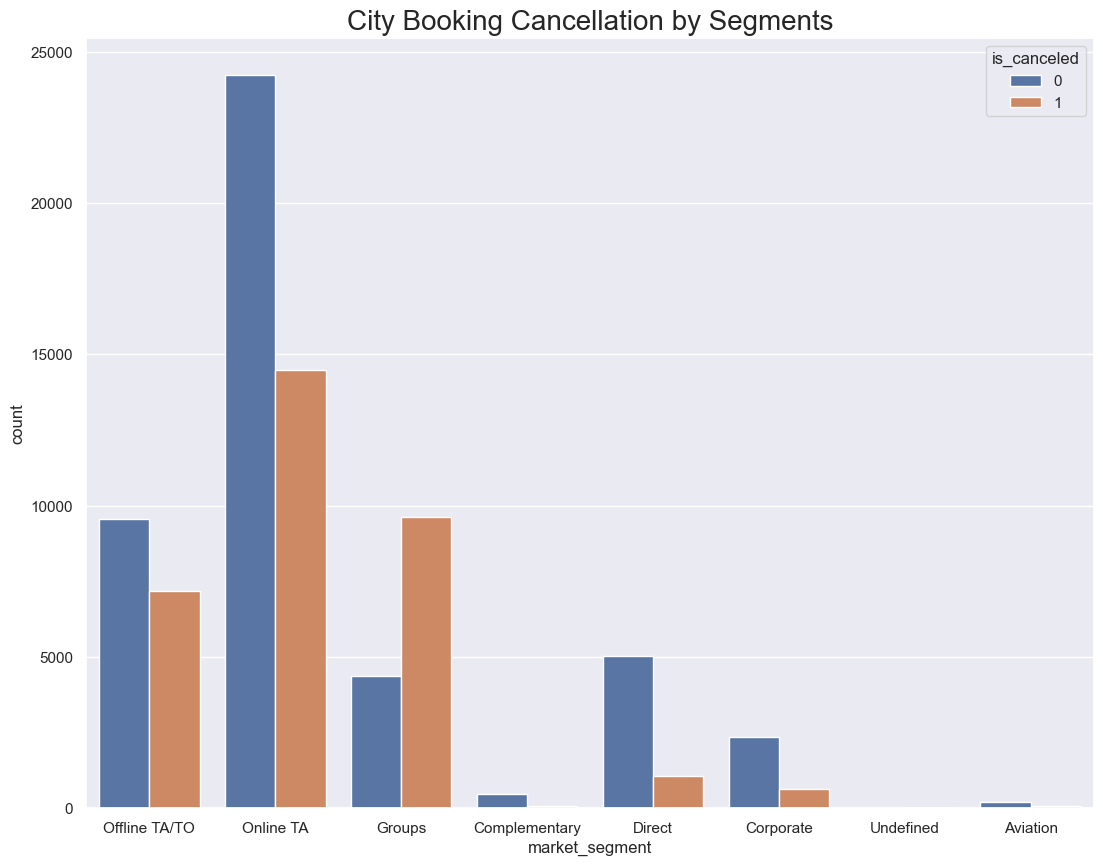

In [65]:
#Bookings that are most likey to cancel based on where reservation was made
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("City Booking Cancellation by Segments", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = city_data)



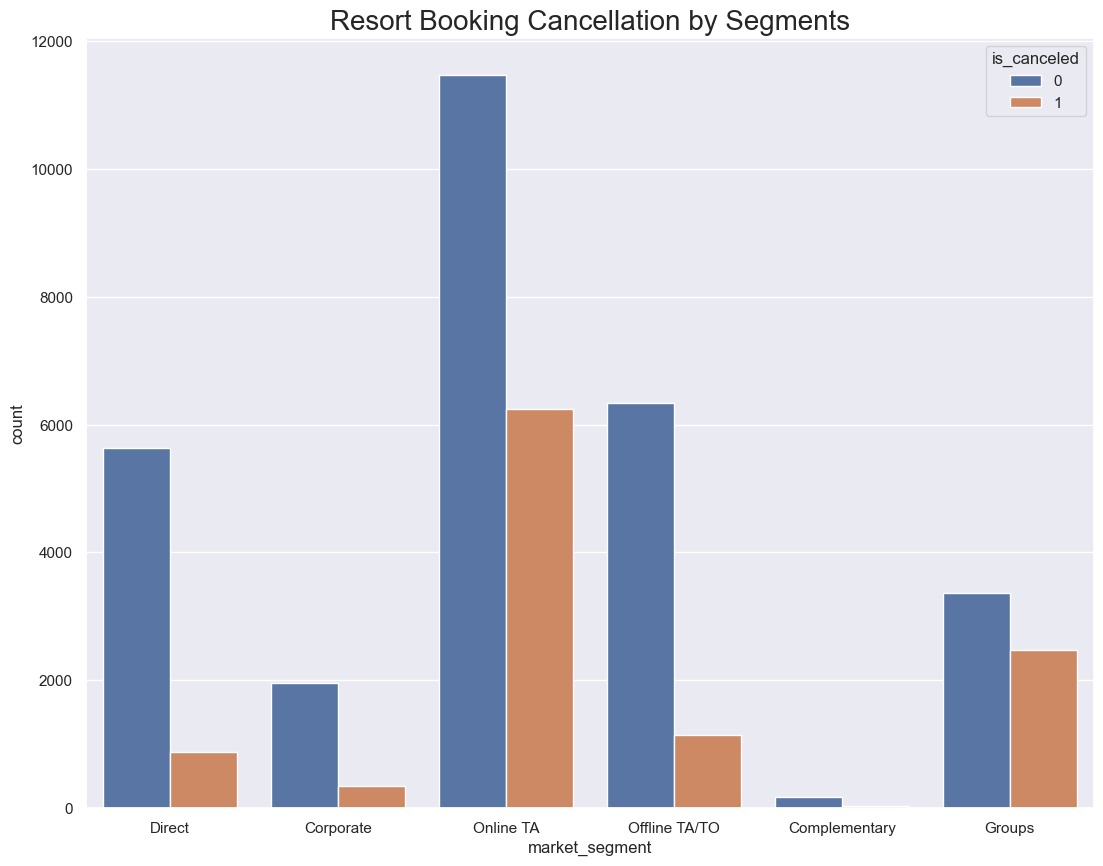

In [25]:
#Bookings that are most likey to cancel based on where reservation was made
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Resort Booking Cancellation by Segments", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = resort_data)

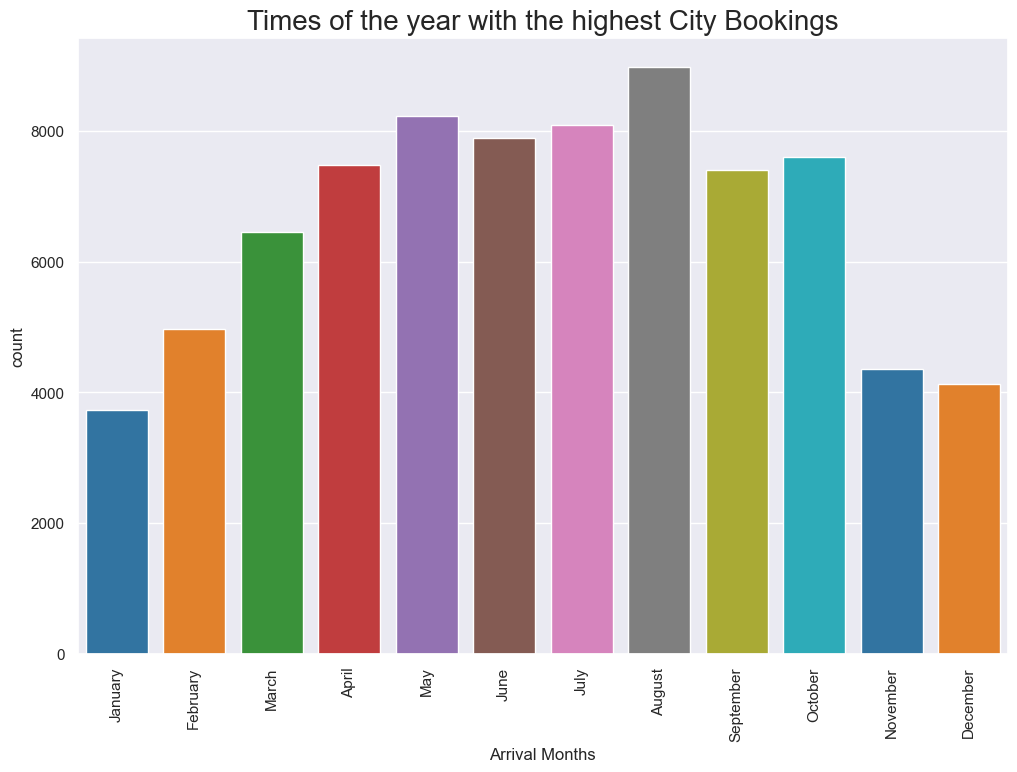

In [30]:
#Sort months in correct order for better visulization
months_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(12,8))
plt.title("Times of the year with the highest City Bookings", fontdict = {'fontsize': 20})
sns.countplot(x = city_data['arrival_date_month'], palette='tab10', order = months_sorted)
plt.xlabel('Arrival Months')
plt.xticks(rotation = 90)
plt.show()

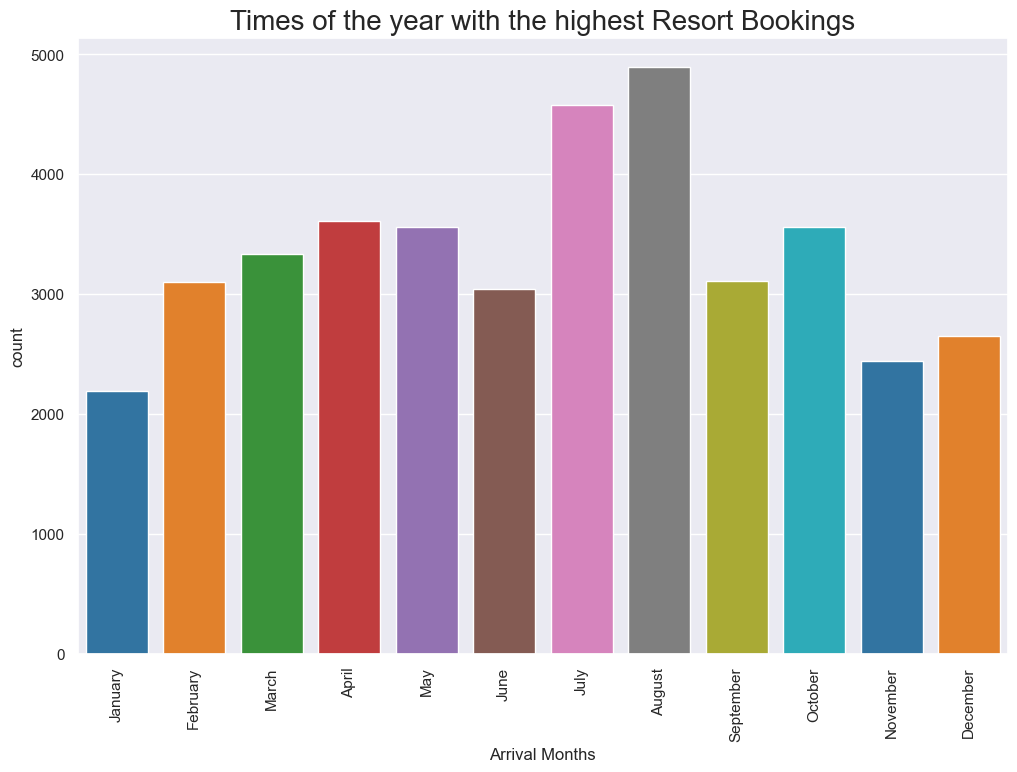

In [29]:
#Sort months in correct order for better visulization
months_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(12,8))
plt.title("Times of the year with the highest Resort Bookings", fontdict = {'fontsize': 20})
sns.countplot(x = resort_data['arrival_date_month'], palette='tab10', order = months_sorted)
plt.xlabel('Arrival Months')
plt.xticks(rotation = 90)
plt.show()

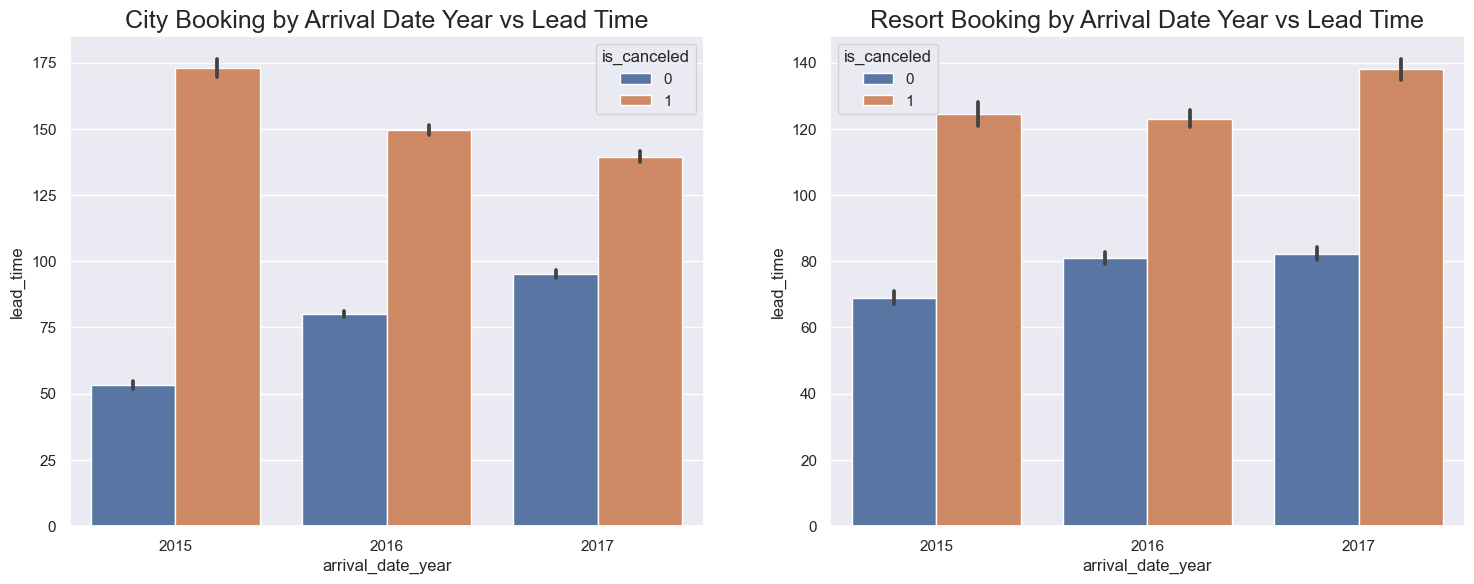

In [75]:
plt.figure(figsize=(18,14))
sns.set(style = "darkgrid")
plt.subplot(221)
plt.title("City Booking by Arrival Date Year vs Lead Time", fontdict = {'fontsize': 18})
ax = sns.barplot(x = "arrival_date_year" , y = "lead_time",hue = 'is_canceled', data = city_data)
plt.subplot(222)
plt.title("Resort Booking by Arrival Date Year vs Lead Time", fontdict = {'fontsize': 18})
ax = sns.barplot(x = "arrival_date_year" , y = "lead_time",hue = 'is_canceled', data = resort_data)

It apprears as though over the years, customers have begun to cancel their City Hotel bookings sooner rather than later. It is clearly not the case for Resort Hotel bookings. Customers in 2017 have actually began to cancel their Resort Hotel booking noticeably much later the year 2017.

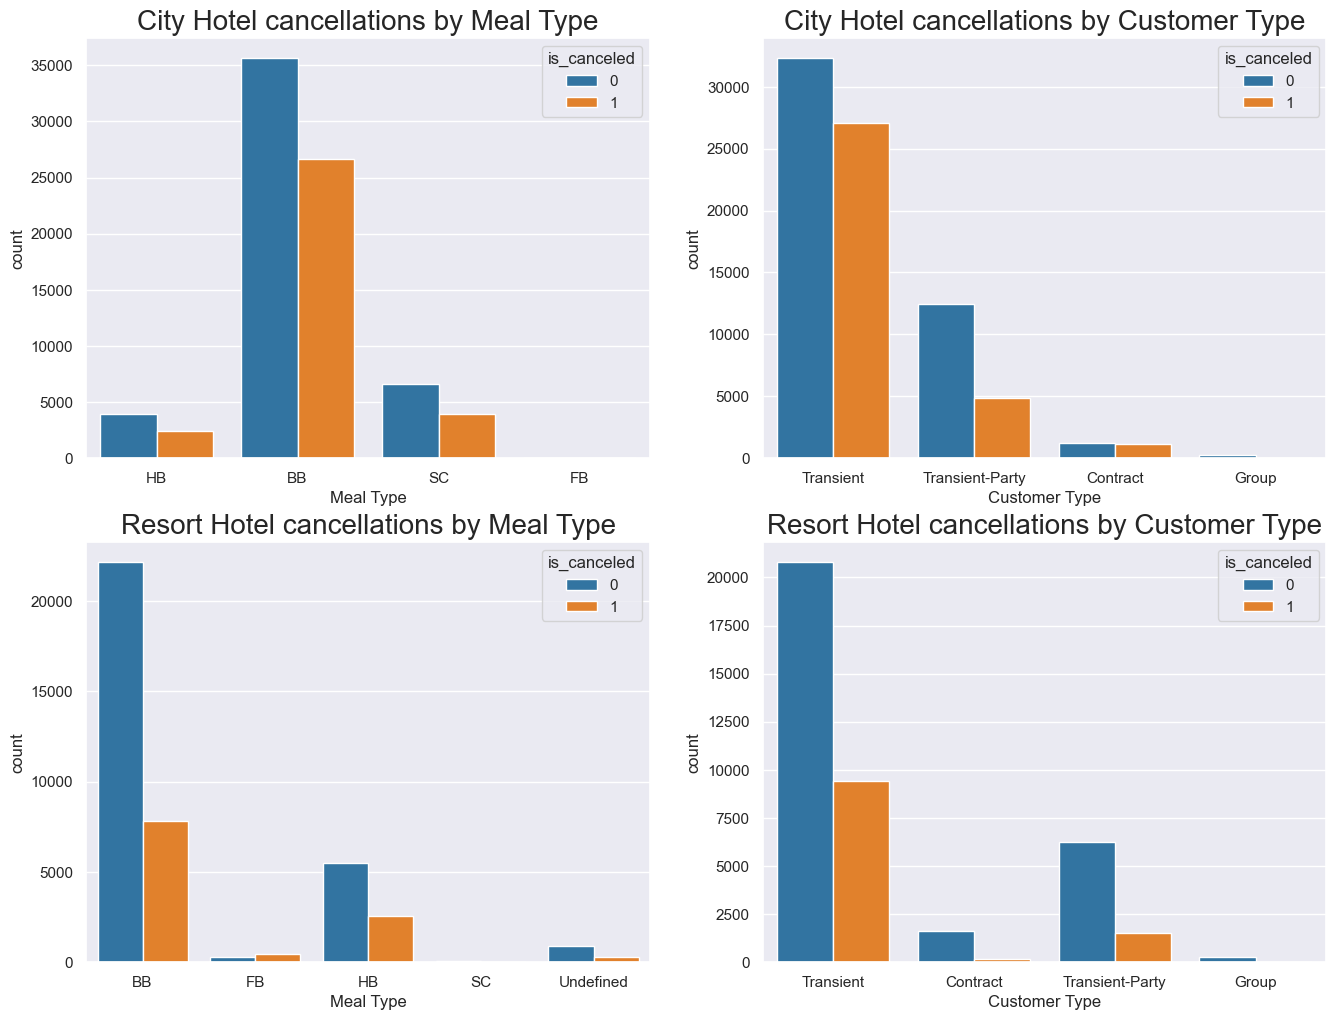

In [57]:
plt.figure(figsize=(16,12))
sns.set(palette = "tab10")
plt.subplot(221)
sns.countplot(x = city_data['meal'], hue=city_data['is_canceled'])
plt.title("City Hotel cancellations by Meal Type", fontdict = {'fontsize':20})
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(x = city_data['customer_type'], hue=city_data['is_canceled'])
plt.title("City Hotel cancellations by Customer Type", fontdict = {'fontsize':20})
plt.xlabel('Customer Type')

plt.subplot(223)
sns.countplot(x = resort_data['meal'], hue=resort_data['is_canceled'])
plt.title("Resort Hotel cancellations by Meal Type", fontdict = {'fontsize':20})
plt.xlabel('Meal Type')
plt.subplot(224)
sns.countplot(x = resort_data['customer_type'], hue=resort_data['is_canceled'])
plt.title("Resort Hotel cancellations by Customer Type", fontdict = {'fontsize':20})
plt.xlabel('Customer Type')

plt.show()

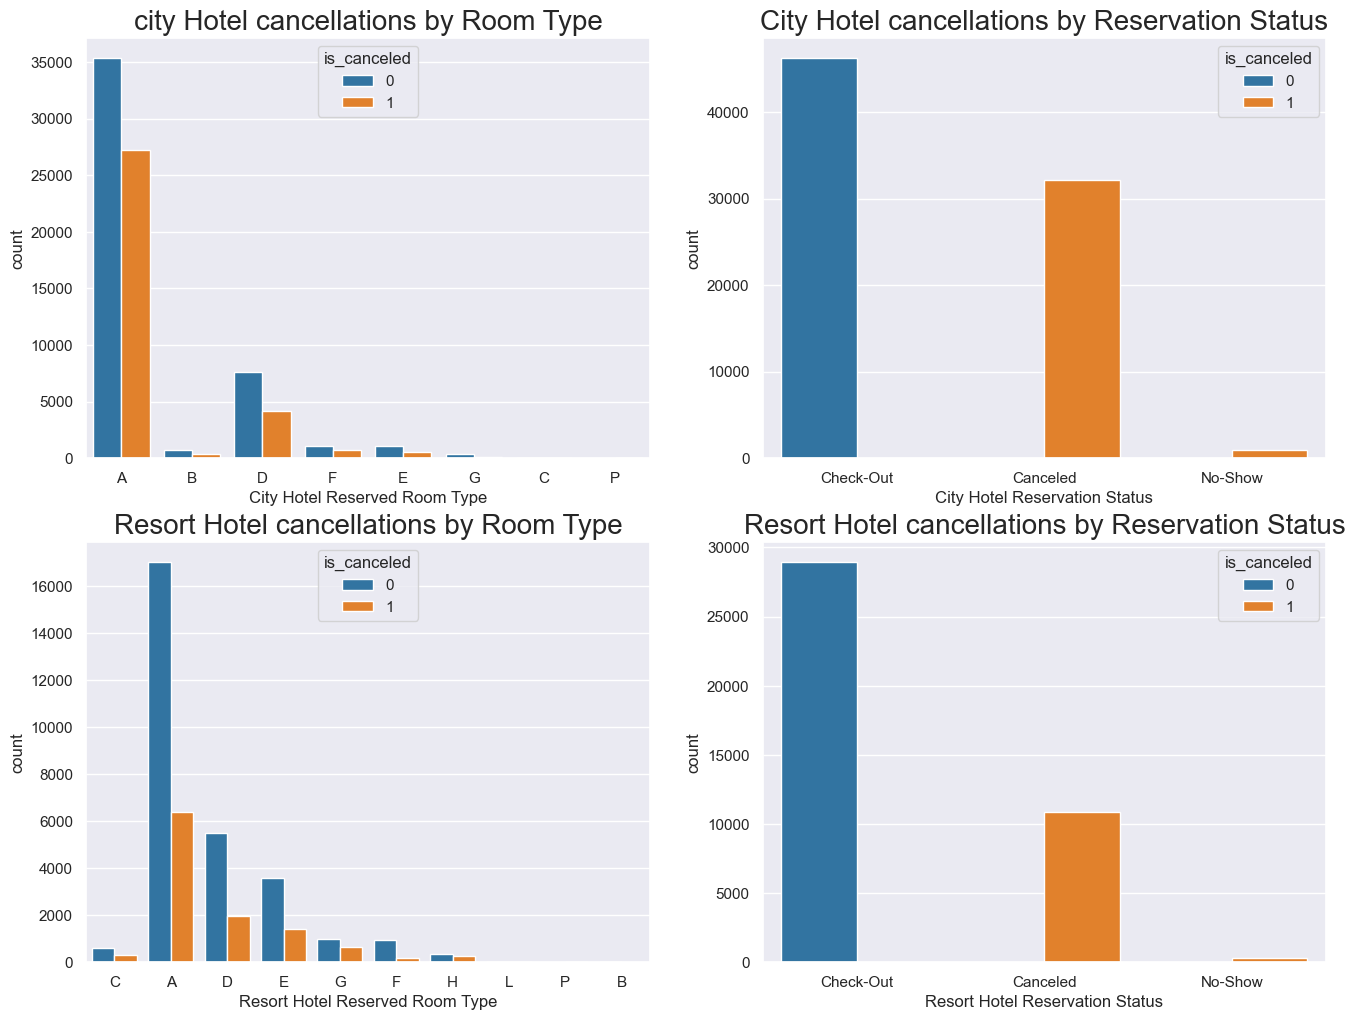

In [59]:
plt.figure(figsize=(16,12))
sns.set(palette = "tab10")
plt.subplot(221)
sns.countplot(x = city_data['reserved_room_type'], hue=city_data['is_canceled'])
plt.title("city Hotel cancellations by Room Type", fontdict = {'fontsize':20})
plt.xlabel('City Hotel Reserved Room Type')
plt.subplot(222)
sns.countplot(x = city_data['reservation_status'], hue=city_data['is_canceled'])
plt.title("City Hotel cancellations by Reservation Status", fontdict = {'fontsize':20})
plt.xlabel('City Hotel Reservation Status')
plt.subplot(223)
sns.countplot(x = resort_data['reserved_room_type'], hue=resort_data['is_canceled'])
plt.title("Resort Hotel cancellations by Room Type", fontdict = {'fontsize':20})
plt.xlabel('Resort Hotel Reserved Room Type')
plt.subplot(224)
sns.countplot(x = resort_data['reservation_status'], hue=resort_data['is_canceled'])
plt.title("Resort Hotel cancellations by Reservation Status", fontdict = {'fontsize':20})
plt.xlabel('Resort Hotel Reservation Status')

plt.show()

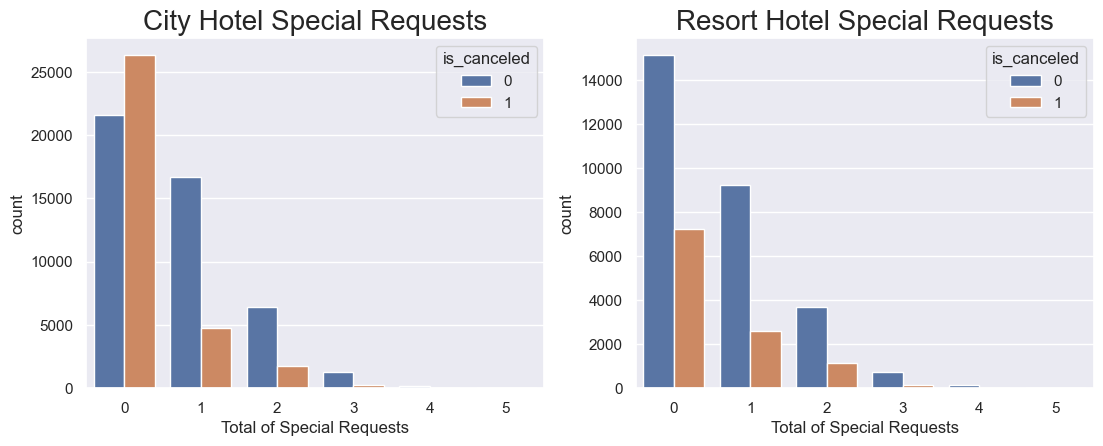

In [55]:
#Bookings made with 1 or more special request are less likey to cancel
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.subplot(221)
plt.title("City Hotel Special Requests", fontdict = {'fontsize':20})
ax = sns.countplot(x = "total_of_special_requests", hue = 'is_canceled', data = city_data)
plt.xlabel('Total of Special Requests')

plt.subplot(222)
plt.title("Resort Hotel Special Requests", fontdict = {'fontsize':20})
ax = sns.countplot(x = "total_of_special_requests", hue = 'is_canceled', data = resort_data)
plt.xlabel('Total of Special Requests')
plt.show()

Customers who book _without_ a special request at a City Hotel are much more likley to cancel as opposed to the customers who book _with_ at least one special request. 

In Resort Hotels Customers are still less likley to cancel even _without_ a special request.

## Conclusion

Customers are overall much less likey to cancel a Resort Hotel booking in comparison to a City Hotel. This has been proven through many different visual obervations.